# ***순서***
---

*0. 라이브러리 및 데이터 불러오기*

## **1. EDA (데이터 이해)**
---

*1-1) 분석 대상 선정을 위한 EDA*
- 1-1-a) 여행 동반자 유형
- 1-1-b) 비여행 이유
- 1-1-c) 선호 교통수단

*1-2) 분석 대상 EDA*
- 1-2-a) 분석 대상 추출
- 1-2-b) 여행 활동
- 1-2-c) 만족한 요소

## **2. 데이터 전처리**
---

*2-1) 결측치 처리* <br>
*2-2) 피처셀렉션* <br>
*2-3) 스케일링* <br>
*2-4) 주성분분석(PCA)*

  
## 3. **모델링 (군집분석)**
---

*3-1) 계층형 군집분석* <br>
*3-2) 군집 선정* <br>
*3-3) 여행횟수 평균 이하인 지역만 추출* <br>
*3-4) 최종 지역 선정*

### 0. 라이브러리 및 데이터 불러오기

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn.objects as so
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
# 데이터 불러오기
df_2023 = pd.read_csv('관광방범대데이터/2023_국민여행조사_원자료.csv', skiprows=1)
df_2023

,ID,SA1_1,SA1_2,SA1_3,SA1_4,SA1_5,SA1_6,MON_EXP_1,MON_EXP_2,MON_EXP_3,...,국내_A_기타전체여행_휴일,국내_A_기타전체여행_명절연휴,국내_A_기타숙박여행_평일,국내_A_기타숙박여행_주말,국내_A_기타숙박여행_휴일,국내_A_기타숙박여행_명절연휴,국내_A_기타당일여행_평일,국내_A_기타당일여행_주말,국내_A_기타당일여행_휴일,국내_A_기타당일여행_명절연휴
0,11010560931_124820,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11010560931_124821,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11010560931_124823,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11010560931_124825,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11010560931_124833,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52106,39020620051_297295,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52107,39020620051_297296,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52108,39020620051_297297,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52109,39020620051_297298,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **1. EDA (데이터 이해)**

### *1-1) 분석 대상 필터링*

In [ ]:
# 분석 대상 : 결혼하고 자식이 있으며 근로 중
df_t = df_2023[(df_2023['DQ5']==1) & (df_2023['DQ3'] != 1) & (df_2023['DQ3A_2']+df_2023['DQ3A_3'] >=1)]

# 분석대상 중에서 여행 경험이 있으며 자녀를 여행에 동반한 경우만 추출
df_T = df_t[(df_t['국내_연간여행경험_국내전체'] == 0) & (df_t['A7A']>=1) & (df_t['A7B_1'] == 1)]

### *1-2) 분석 대상 EDA*

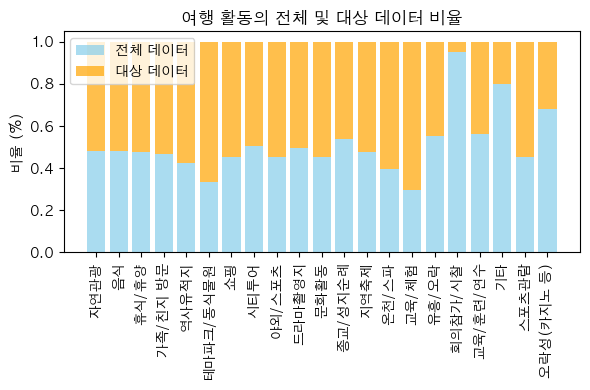

In [ ]:
# 여행에서의 활동

## 비여행이 아님 = 여행 경험 존재
df_all = df_2023[df_2023['B9_1'].isna()] # 여행 경험이 있는 모든 표본

## 여행 활동 컬럼 가져오기
df_act_all = df_all[['A5_1', 'A5_2', 'A5_3', 'A5_4', 'A5_5', 'A5_6', 'A5_7', 'A5_8', 'A5_9', 'A5_10',
              'A5_11', 'A5_12', 'A5_13', 'A5_14', 'A5_15', 'A5_16', 'A5_17', 'A5_18', 'A5_19', 'A5_20', 'A5_21']]

## 여행에서 한 활동 카운트
act_count = []
for i in df_act_all.columns :
    act = df_act_all[i].count()
    act_count.append(act)
df_act_prop_all = pd.DataFrame({'Activation' : df_act_all.columns,
                            'count' : act_count,})
df_act_prop_all['Activation'] = df_act_prop_all['Activation'].map({'A5_1' : '자연관광', 'A5_2' : '음식',
                                                          'A5_3' : '야외/스포츠', 'A5_4' : '역사유적지',
                                                          'A5_5' : '테마파크/동식물원', 'A5_6' : '휴식/휴양',
                                                          'A5_7' : '온천/스파', 'A5_8' : '쇼핑',
                                                          'A5_9' : '문화활동', 'A5_10' : '스포츠관람',
                                                          'A5_11' : '지역축제', 'A5_12' : '교육/체험',
                                                          'A5_13' : '종교/성지순례', 'A5_14' : '오락성(카지노 등)',
                                                          'A5_15' : '시티투어', 'A5_16' : '드라마촬영지',
                                                          'A5_17' : '유흥/오락', 'A5_18' : '가족/친지 방문',
                                                          'A5_19' : '회의참가/시찰', 'A5_20' : '교육/훈련/연수',
                                                          'A5_21' : '기타'})
df_act_prop_all['비율(전체)'] = (df_act_prop_all['count'] / len(df_act_all)) * 100
df_act_prop_all = df_act_prop_all.sort_values('count', ascending=False)

# 분석 대상에 대해서도 위의 과정 그대로 적용
df_act = df_T[['A5_1', 'A5_2', 'A5_3', 'A5_4', 'A5_5', 'A5_6', 'A5_7', 'A5_8', 'A5_9', 'A5_10',
              'A5_11', 'A5_12', 'A5_13', 'A5_14', 'A5_15', 'A5_16', 'A5_17', 'A5_18', 'A5_19', 'A5_20', 'A5_21']]

act_count = []
for i in df_act.columns :
    act = df_act[i].count()
    act_count.append(act)
df_act_prop_target = pd.DataFrame({'Activation' : df_act.columns,
                            'count' : act_count,})
df_act_prop_target['Activation'] = df_act_prop_target['Activation'].map({'A5_1' : '자연관광', 'A5_2' : '음식',
                                                          'A5_3' : '야외/스포츠', 'A5_4' : '역사유적지',
                                                          'A5_5' : '테마파크/동식물원', 'A5_6' : '휴식/휴양',
                                                          'A5_7' : '온천/스파', 'A5_8' : '쇼핑',
                                                          'A5_9' : '문화활동', 'A5_10' : '스포츠관람',
                                                          'A5_11' : '지역축제', 'A5_12' : '교육/체험',
                                                          'A5_13' : '종교/성지순례', 'A5_14' : '오락성(카지노 등)',
                                                          'A5_15' : '시티투어', 'A5_16' : '드라마촬영지',
                                                          'A5_17' : '유흥/오락', 'A5_18' : '가족/친지 방문',
                                                          'A5_19' : '회의참가/시찰', 'A5_20' : '교육/훈련/연수',
                                                          'A5_21' : '기타'})
df_act_prop_target['비율(분석대상)'] = (df_act_prop_target['count'] / len(df_act)) * 100
df_act_prop_target = df_act_prop_target.sort_values('count', ascending=False)

# 데이터 결합
df_act_prop = df_act_prop_all.merge(df_act_prop_target, on='Activation')
activities = df_act_prop['Activation']
total_prop = df_act_prop['비율(전체)']
target_prop = df_act_prop['비율(분석대상)']

# 여행 경험있는 표본 전체와 여행 경험 있는 분석 대상의 여행활동 비율 구하기
normalized_total = total_prop / (total_prop + target_prop)
normalized_target = target_prop / (total_prop + target_prop)

# 시각화 _전체와 분석 대상 비교했을 때 유독 대상 데이터에서 유독 비율이 높았던 활동 관찰

# 한글 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False


fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(activities, normalized_total, label='전체 데이터', color='skyblue', alpha=0.7)
ax.bar(activities, normalized_target, bottom=normalized_total, label='대상 데이터',color='orange', alpha=0.7)

# 레이블 추가
ax.set_ylabel('비율 (%)')
ax.set_title('여행 활동의 전체 및 대상 데이터 비율')
ax.set_xticklabels(activities, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

- 교육/체험이나 테마파크/동식물원의 활동 비율이 높음을 확인 가능

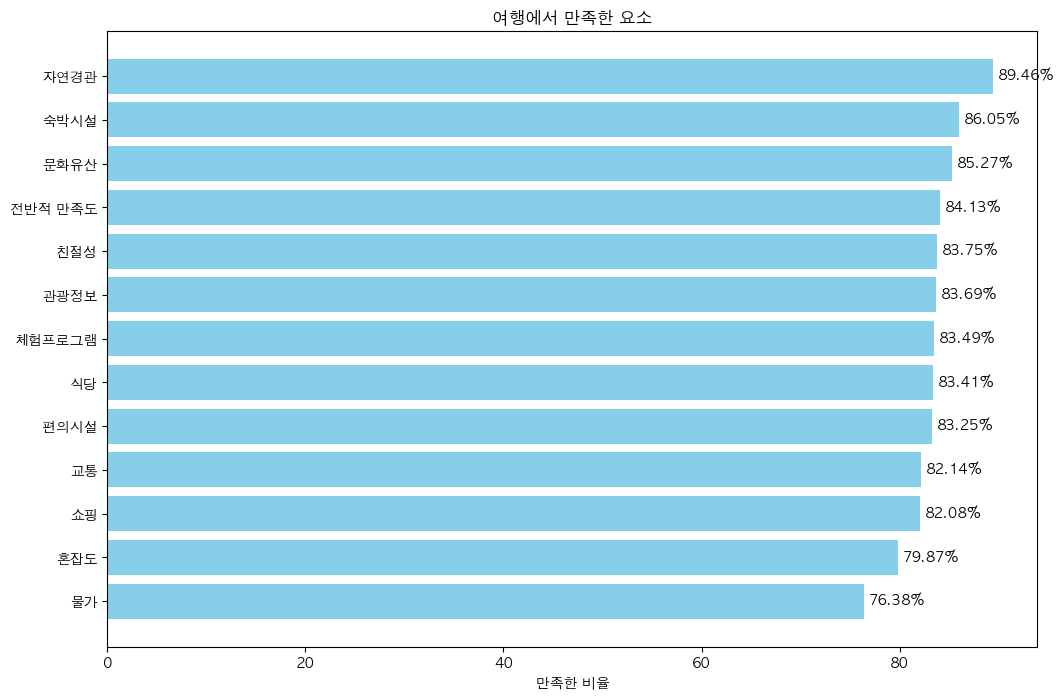

In [ ]:
# 여행에서 만족한 요소

# 만족한 요소 컬럼 전부 가져오기
df_satis = df_T[['A10', 'A10A_1', 'A10A_2', 'A10A_3', 'A10A_4', 'A10A_5', 'A10A_6',
            'A10A_7', 'A10A_8', 'A10A_9','A10A_10', 'A10A_11', 'A10A_12']]
df_satis = df_satis.applymap(lambda x: np.nan if x == 9 else x)

# 평균적인 여행 요소의 만족도 구하기
satis_mean = []
for i in df_satis.columns :
    satis = df_satis[i].mean()*20
    satis_mean.append(satis)
df_satis_prop = pd.DataFrame({'Satisfaction' : df_satis.columns,
                            'mean' : satis_mean,})
df_satis_prop['Satisfaction'] = df_satis_prop['Satisfaction'].map({'A10' : '전반적 만족도', 'A10A_1' : '자연경관',
                                                                  'A10A_2' : '문화유산', 'A10A_3' : '교통',
                                                                  'A10A_4' : '숙박시설', 'A10A_5' : '식당',
                                                                  'A10A_6' : '쇼핑', 'A10A_7' : '관광정보',
                                                                  'A10A_8' : '편의시설', 'A10A_9' : '친절성',
                                                                  'A10A_10' : '체험프로그램', 'A10A_11' : '물가',
                                                                  'A10A_12' : '혼잡도'})
df_satis_prop = df_satis_prop.sort_values('mean', ascending=False)

# 한글 깨짐 방지
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 준비
plt.figure(figsize=(12, 8))
bars = plt.barh(df_satis_prop['Satisfaction'], df_satis_prop['mean'], color='skyblue')
plt.xlabel('만족한 비율')
plt.title('여행에서 만족한 요소')

# 그래프 반전 (높은 값이 위로 가도록)
plt.gca().invert_yaxis()

# 각 바에 수치 레이블 추가
for bar in bars:
    plt.text(bar.get_width() + 0.5,  # x 좌표 (바의 끝에서 약간 오른쪽)
             bar.get_y() + bar.get_height()/2,  # y 좌표 (바의 중앙)
             f'{bar.get_width():.2f}%',  # 표시할 텍스트 (소수점 1자리까지)
             va='center')  # 수직 정렬: 중앙


# 그래프 출력
plt.show()

- 분석대상은 자연경관, 문화유산 등의 만족도가 높은 것으로 나타남

## **2. 데이터 전처리**

In [ ]:
# 활용 데이터 불러오기
df = pd.read_csv('관광방범대데이터/관광_merged.csv')
df

,시도명,시군구명,공원 수,산 개수,바다 인접,유적지 개수,체험 개수,주차장,km²당 와이파이 개수,테마파크 개수,축제 수,지출액,추천 의향,평균접근시간
0,강원,강릉시,29.0,33.0,1.0,92.0,50.0,234110.6,1.021300,11.0,9.0,40242021.0,3.0,12.431250
1,강원,고성군,18.0,2.0,1.0,19.0,16.0,67522.0,0.154365,1.0,2.0,10670802.0,3.0,10.021667
2,강원,동해시,31.0,4.0,1.0,22.0,16.0,144944.3,0.515778,NaN,5.0,3480000.0,3.0,9.873636
3,강원,삼척시,29.0,24.0,1.0,39.0,18.0,141093.6,0.086712,2.0,9.0,12415011.0,3.0,17.782000
4,강원,속초시,19.0,5.0,1.0,25.0,6.0,110735.1,0.813239,3.0,NaN,41139055.0,3.0,5.035556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,충북,제천시,33.0,1444.0,NaN,37.0,83.0,493365.9,0.314918,1.0,2.0,7213000.0,3.0,21.393500
225,충북,증평군,18.0,9.0,NaN,7.0,6.0,48044.2,2.396088,5.0,2.0,340002.0,3.0,6.776667
226,충북,진천군,17.0,36.0,NaN,27.0,45.0,307454.2,0.729049,NaN,2.0,818996.0,3.0,13.617500
227,충북,청주시,140.0,157.0,NaN,49.0,48.0,1434731.8,0.291163,2.0,3.0,2987001.0,3.0,17.296897


### 3-1) 결측치 처리

In [ ]:
# 데이터 이름 변환
df = df.rename(columns = {'시도명' : 'D_1', '시군구명' : 'D_2', '공원 수' : 'park', '산 개수' : 'mountain', '바다 인접' : 'sea',
                         '유적지 개수' : 'historic', '체험 개수' : 'experience', '주차장' : 'parking_lot',
                         'km²당 와이파이 개수' : 'wifi' , '테마파크 개수' : 'amusement', '축제 수' : 'festival',
                         '지출액' : 'consumption', '추천 의향' : 'recomm', '평균접근시간' : 'accept_time'})

# 지출액과 추천의향은 같은 시내의 평균으로 결측치 대치
df['consumption'] = df.groupby('D_1')['consumption'].transform(lambda x : x.fillna(x.mean()))
df['recomm'] = df.groupby('D_2')['recomm'].transform(lambda x : x.fillna(x.mean()))

# 이 외의 개수 결측치 = 그냥 없어서 발생하는 결측치이므로 0으로 대체
df.fillna(0, inplace=True)

# 추천의향이 너무 낮은 컬럼은 배제 _ 2.5 기준
df_copy = df.copy()
recomm_x = df[df['recomm'] < 2.5].index
df= df.drop(index=recomm_x)

# 최종 결측치 개수 확인
print(df.isna().sum())

D_1            0
D_2            0
park           0
mountain       0
sea            0
historic       0
experience     0
parking_lot    0
wifi           0
amusement      0
festival       0
consumption    0
recomm         0
accept_time    0
dtype: int64


In [ ]:
df

,D_1,D_2,park,mountain,sea,historic,experience,parking_lot,wifi,amusement,festival,consumption,recomm,accept_time
0,강원,강릉시,29.0,33.0,1.0,92.0,50.0,234110.6,1.021300,11.0,9.0,40242021.0,3.0,12.431250
1,강원,고성군,18.0,2.0,1.0,19.0,16.0,67522.0,0.154365,1.0,2.0,10670802.0,3.0,10.021667
2,강원,동해시,31.0,4.0,1.0,22.0,16.0,144944.3,0.515778,0.0,5.0,3480000.0,3.0,9.873636
3,강원,삼척시,29.0,24.0,1.0,39.0,18.0,141093.6,0.086712,2.0,9.0,12415011.0,3.0,17.782000
4,강원,속초시,19.0,5.0,1.0,25.0,6.0,110735.1,0.813239,3.0,0.0,41139055.0,3.0,5.035556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,충북,제천시,33.0,1444.0,0.0,37.0,83.0,493365.9,0.314918,1.0,2.0,7213000.0,3.0,21.393500
225,충북,증평군,18.0,9.0,0.0,7.0,6.0,48044.2,2.396088,5.0,2.0,340002.0,3.0,6.776667
226,충북,진천군,17.0,36.0,0.0,27.0,45.0,307454.2,0.729049,0.0,2.0,818996.0,3.0,13.617500
227,충북,청주시,140.0,157.0,0.0,49.0,48.0,1434731.8,0.291163,2.0,3.0,2987001.0,3.0,17.296897


### 3-2) 피처셀렉션

In [ ]:
# 시도와 시군구 합친 지역 컬럼 생성
df['region'] = df['D_1'].str.cat(df['D_2'])
df_t = df.drop(['D_1', 'D_2'], axis=1)
df_t = df_t[['region', 'park', 'mountain', 'sea', 'historic', 'experience',
       'parking_lot', 'wifi', 'amusement', 'festival', 'consumption', 'recomm', 'accept_time']]

# 피처 정리
X = df_t.drop('region', axis=1)
y = df_t['region']

# 임계값 설정하여 feature selector 만들기
from sklearn.feature_selection import VarianceThreshold # 분산을 통해 피처의 중요도를 파악
threshold = 0.1 # 임계값 지정
selector = VarianceThreshold(threshold)
df_reduced = selector.fit_transform(X)

# 선택된 특성 확인
selected_features = X.columns[selector.get_support(indices=True)]
print('selected_features 선택된 피처 ', selected_features.tolist())

selected_features 선택된 피처  ['park', 'mountain', 'sea', 'historic', 'experience', 'parking_lot', 'wifi', 'amusement', 'festival', 'consumption', 'accept_time']


In [ ]:
# 추천 컬럼은 배제
X = X.drop('recomm', axis=1)

### 3-3) 스케일링

In [ ]:
# 스케일링 실시
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.38612031, -0.24984544,  1.5223207 , ...,  0.68557218,
         3.66293436, -0.63766865],
       [-0.64171795, -0.33711423,  1.5223207 , ..., -0.45289785,
         0.60164112, -0.86079684],
       [-0.33964801, -0.33148398,  1.5223207 , ...,  0.03501788,
        -0.14277032, -0.8745045 ],
       ...,
       [-0.6649541 , -0.24140008, -0.65689181, ..., -0.45289785,
        -0.41824471, -0.52782152],
       [ 2.19309221,  0.09922968, -0.65689181, ..., -0.29025928,
        -0.19380692, -0.18710821],
       [ 1.03128477,  0.89872433, -0.65689181, ..., -0.45289785,
        -0.17579397, -0.38561388]])

### 3-4) 주성분분석(PCA)

차원의 개수가 2 일 때
누적 분산은 0.3795063442230486
차원의 개수가 3 일 때
누적 분산은 0.5111492962376105
차원의 개수가 4 일 때
누적 분산은 0.6136568099931001
차원의 개수가 5 일 때
누적 분산은 0.7059928406679775
차원의 개수가 6 일 때
누적 분산은 0.7845993962079272
차원의 개수가 7 일 때
누적 분산은 0.8516491957289959
차원의 개수가 8 일 때
누적 분산은 0.9131598876721259
차원의 개수가 9 일 때
누적 분산은 0.965641681391436


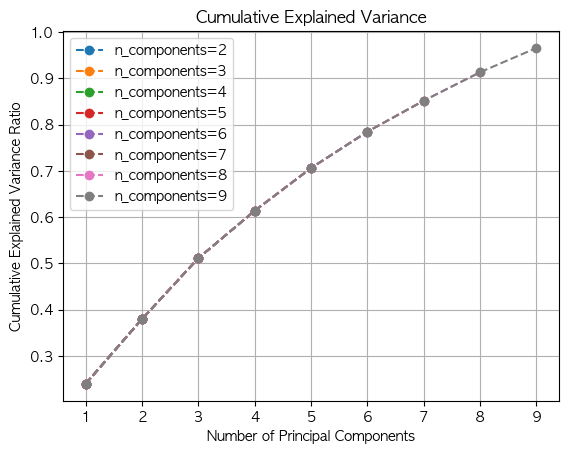

In [ ]:
# 차원의 개수 올려보면서 관찰
for i in range(2,10) :
    pca = PCA(n_components = i)
    pca.fit(X_scaled)
    print(f'차원의 개수가 {i} 일 때')
    variance_t = 0
    variance = []
    for j in range(i) :
        v_ratio = pca.explained_variance_ratio_[j]
        variance_t += v_ratio
        variance.append(variance_t)
    plt.plot(range(1, i + 1), variance, marker='o', linestyle='--', label=f'n_components={i}')
    print(f'누적 분산은 {np.sum(pca.explained_variance_ratio_)}')

# 누적 분산 관찰 => 최초로 80% 이상이 되는 지점 포착
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# PCA 적용
## k=7일 때부터 80% 이상
k = 7
pca = PCA(n_components=k)
df_pca = pca.fit_transform(X_scaled)

# 차원별 피처 기여도
pca_components = pd.DataFrame(pca.components_, columns=X.columns)
print(pca_components)

       park  mountain       sea  historic  experience  parking_lot      wifi  \
0  0.360604  0.035469  0.028453  0.200545    0.328059     0.470546 -0.101933   
1 -0.500169  0.182604  0.300026  0.394013   -0.267675    -0.110480 -0.440872   
2 -0.071014 -0.410771  0.352897 -0.384002   -0.144709    -0.171640  0.352691   
3 -0.258334  0.253664 -0.597245 -0.005294   -0.135498    -0.360034  0.221077   
4  0.030881  0.358697 -0.150172  0.027045    0.334106    -0.099600  0.361966   
5  0.057437  0.695141  0.191084 -0.340041    0.011590     0.110540 -0.140617   
6 -0.228148 -0.011000  0.297592  0.464051    0.550099    -0.217443  0.321123   

   amusement  festival  consumption  accept_time  
0   0.487820  0.186204     0.461572    -0.050629  
1   0.139627 -0.104627     0.314824     0.251883  
2   0.233895  0.311067     0.259149     0.401012  
3   0.333905  0.302142     0.232277    -0.242062  
4   0.120732 -0.488356     0.023285     0.583886  
5  -0.152026  0.501554    -0.135072     0.190526  
6 

                  PC1       PC2       PC3       PC4       PC5       PC6  \
park         0.586760 -0.622101 -0.085660 -0.274978  0.031197  0.053537   
mountain     0.057713  0.227119 -0.495492  0.270006  0.362369  0.647948   
sea          0.046298  0.373167  0.425681 -0.635723 -0.151709  0.178111   
historic     0.326318  0.490066 -0.463201 -0.005635  0.027322 -0.316955   
experience   0.533804 -0.332930 -0.174555 -0.144228  0.337526  0.010803   
parking_lot  0.765653 -0.137413 -0.207040 -0.383230 -0.100620  0.103036   
wifi        -0.165861 -0.548349  0.425432  0.235320  0.365672 -0.131071   
amusement    0.793760  0.173665  0.282135  0.355417  0.121968 -0.141705   
festival     0.302984 -0.130133  0.375224  0.321608 -0.493356  0.467503   
consumption  0.751052  0.391572  0.312598  0.247242  0.023524 -0.125902   
accept_time -0.082381  0.313288  0.483720 -0.257658  0.589864  0.177591   

                  PC7  
park        -0.196405  
mountain    -0.009470  
sea          0.256188  
his

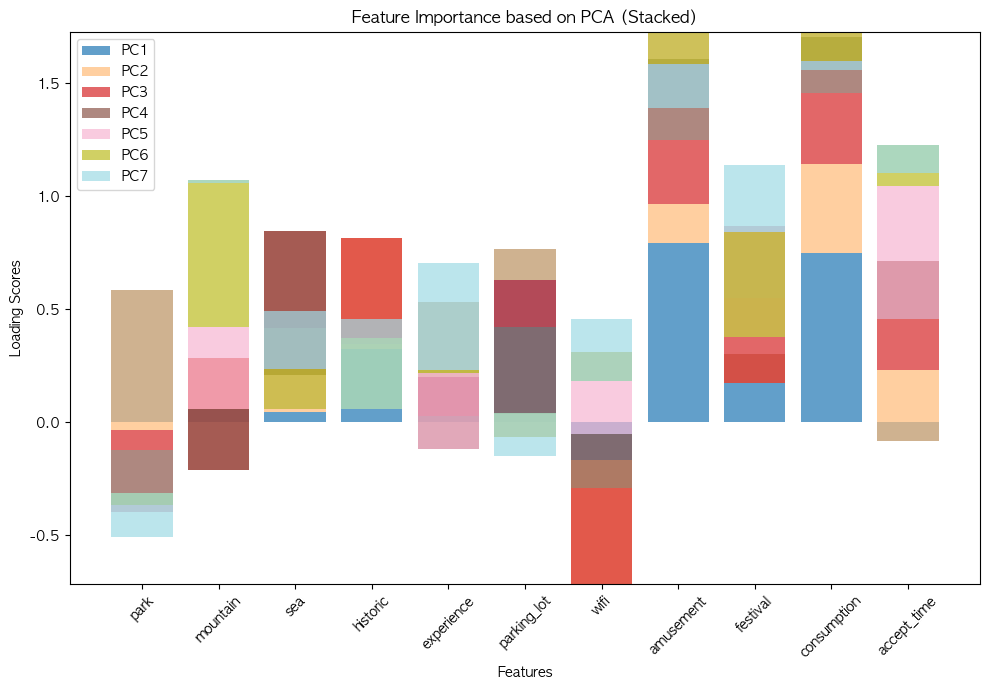

In [ ]:
# 주성분의 차원별 피처 중요도
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_df = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], index=X.columns)
print(loading_df)

# 각 피처의 중요도 시각화
plt.figure(figsize=(10, 7))
# 색상 목록 설정
colors = plt.cm.get_cmap('tab20', 7).colors

# 스택형 막대 그래프를 위한 초기값
bottoms = np.zeros(len(loading_df))

# 각 주성분에 대해 스택형 막대 추가
for i, pc in enumerate(loading_df.columns):
    plt.bar(loading_df.index, loading_df[pc], bottom=bottoms, color=colors[i], alpha=0.7, label=pc)
    bottoms += loading_df[pc]  # 다음 막대를 쌓기 위해 업데이트

plt.ylabel('Loading Scores')
plt.xlabel('Features')
plt.legend(loc='best')
plt.title('Feature Importance based on PCA (Stacked)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 주성분 분석까지 마친 데이터프레임 생성
df_PCA = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7'])
df_PCA

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,2.354914,2.367135,0.950185,0.422214,-0.954280,-0.757231,1.237227
1,-0.659151,0.996458,0.523327,-0.471087,-0.988133,-0.315115,0.088381
2,-0.683595,0.528378,0.364277,-0.698239,-1.264693,0.061800,0.224831
3,-0.008881,1.181337,0.922059,-0.398168,-1.083885,0.264968,0.492929
4,0.881867,1.989346,1.048118,0.303742,-1.060446,-1.056585,-0.208949
...,...,...,...,...,...,...,...
204,0.673201,0.687791,-2.278544,0.638911,1.728159,2.394510,-0.189361
205,-1.239598,-0.187034,-0.330654,0.871803,-0.803959,-0.611279,-0.708461
206,-0.570989,-0.083206,-0.744033,0.106223,-0.332376,-0.422970,-0.291582
207,2.904261,-1.545267,-1.821948,-2.100518,-0.401599,0.368765,-1.662218


## 3. **모델링 (군집분석)**

### 4-1) 계층형 군집분석

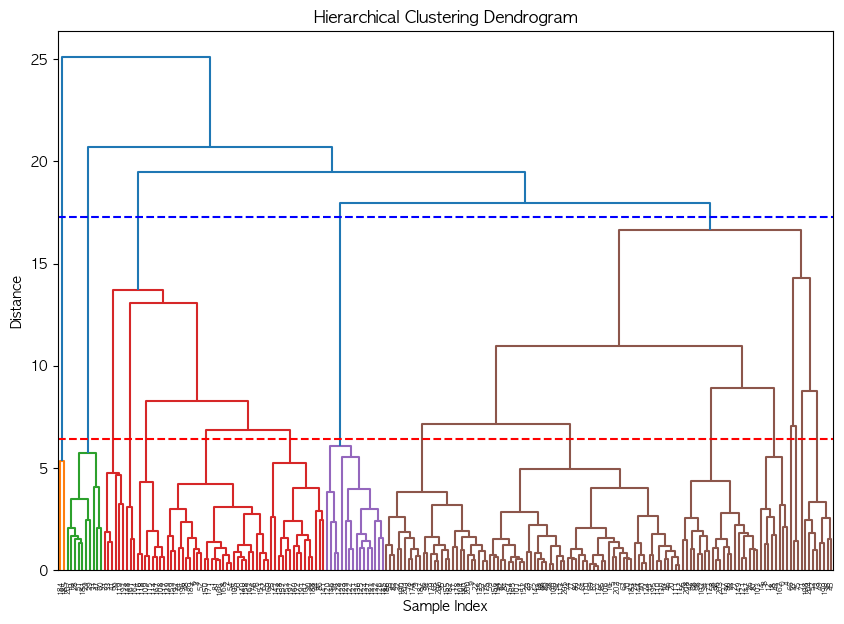

In [ ]:
# 계층적 군집 분석
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 계층적 군집 분석 수행
linked = linkage(df_PCA, 'ward')

# 덴드로그램 생성
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.axhline(y=6.4, color='r', linestyle='--', label='n=16')
plt.axhline(y=17.3, color='b', linestyle='--', label='n=5')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

### 4-2) 추천의향 낮은 여행지는 제외

In [ ]:
# 지역별 여행횟수를 조사하기 위해 이를 나타낼 수 있는 모든 컬럼 가져오기
use_cols = df_T.columns[(df_T.columns.str.contains('D_TRA')) & (df_T.columns.str.contains('SPOT'))]
use_cols_t = []
for i in use_cols :
    na_num = df_T[i].isna().sum()
    if na_num != len(df_T) : # 모든 행이 결측치면 안됨
        use_cols_t.append(i)
    else :
        pass

# 여행횟수 컬럼 만들기 (2023_국민여행조사 활용)
df_visit = df_2023['D_TRA1_1_SPOT'].value_counts().reset_index(name = 'n1')
df_visit.rename(columns={df_visit.columns[0]: 'index'}, inplace=True)

# 코드북을 참고하여 시군구코드 데이터프레임 생성
code = pd.read_csv('시군구 통일.csv')
code = code[['시도명', '시군구명', '시군구코드']]
code = code.rename(columns={'시도명' : 'D1', '시군구명' : 'D2', '시군구코드' : 'D_code'})
code = code.drop_duplicates(subset=['D_code'])
code['D_code'] = np.where(code['D_code'] == '34010 충남 ', 34010, code['D_code'])
code['D_code'] = code['D_code'].astype(float)

# 지역별 여행횟수 데이터 전부 합치기
for i, col in enumerate(use_cols_t):
    value_counts_df = df_2023[col].value_counts().reset_index(name=f'n{i+2}')
    value_counts_df.rename(columns={value_counts_df.columns[0]: 'index'}, inplace=True)
    df_visit = pd.merge(df_visit, value_counts_df, on='index', how='outer')

# 지역별로 여행횟수 전부 sum하여 자료 내에서 집계된 지역의 총 여행 횟수 산출
df_visit.fillna(0, inplace=True)
df_visit['sum_visit'] = df_visit.iloc[:, 1:].sum(axis=1)
df_visit = df_visit[['index', 'sum_visit']]

# 시군구코드로 여행지역과 여행횟수를 동시에 볼 수 있도록 데이터 결합
df_Dcount = code.merge(df_visit, how = 'outer', left_on = 'D_code', right_on='index')#.drop('index', axis=1)
df_Dcount.fillna(0, inplace=True)

# 최종 여행횟수 데이터 완성
trip_count = df_Dcount[['D1', 'D2', 'sum_visit']]
trip_count

,D1,D2,sum_visit
0,서울,종로구,399.0
1,서울,중구,224.0
2,서울,용산구,142.0
3,서울,성동구,80.0
4,서울,광진구,121.0
...,...,...,...
224,경남,함양군,152.0
225,경남,거창군,261.0
226,경남,합천군,232.0
227,제주,제주시,2907.0


In [ ]:
# 군집들의 여행 빈도를 2023_국민여행조사로 확인하기 위해 데이터 불러오기

## 비추천 여행지
df_X = df_copy.iloc[recomm_x][['D_1', 'D_2']]
df_X['x_region'] = df_X['D_1'].str.cat(df_X['D_2'])
X_region = df_X['x_region'].tolist()

## 여행지로서 가치가 있음에도 어떤 지역은 충분히 관광 횟수가 높고 어떤 지역은 관광 횟수가 낮을 수 있움
trip_count['loc'] = trip_count['D1'].str.cat(trip_count['D2'])
recomm_X = trip_count[trip_count['loc'].isin(X_region)].index
trip = trip_count[['loc', 'sum_visit']]
trip = trip.drop(index=recomm_X) # 추천 정도가 낮았던 지역은 배제

## 관광 횟수가 많다 적다의 판단을 위해 평균 구하기
trip['sum_visit'].mean()

348.54545454545456

In [ ]:
## 지역과 군집, 여행횟수 합친 컬럼 생성
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
y_pred = fcluster(linked, 6.4, criterion='distance')
h_cluster = pd.DataFrame({'loc': y,
                             'cluster' : y_pred})
h_region = h_cluster.merge(trip, on='loc')
h_region

,loc,cluster,sum_visit
0,강원강릉시,12,1977.0
1,강원고성군,6,328.0
2,강원동해시,6,388.0
3,강원삼척시,6,513.0
4,강원속초시,12,1754.0
...,...,...,...
204,충북제천시,15,522.0
205,충북증평군,10,42.0
206,충북진천군,9,95.0
207,충북청주시,2,499.0


### 4-3) 군집 선정

- 1 : 제주도
- 2 : 전반적인 여행 인프라가 잘 구축되어 있는 지역
- 3 : 축제가 많이 열리는 지역
- 4 : 바다에 인접한 지역이지만 지역 내의 접근성이 부족한 지역
- 5 : 전반적인 여행 인프라가 부족한 지역
- 6 : 바다 인접 지역이지만 여행하기에 인프라는 부족한 지역
- 7 : 바다 인접 지역 중 여행 인프라가 괜찮은 지역
- 8 : 수도권
- 9 : 유적지와 체험이 강점인 지역
- 10 : 여행인프라가 부족한 곳
- 11 : 공원이 많고 체험시설이 많은 지역
- 12 : 여행인프라가 이미 발달되어있는 지역
- 13 : 역사와 체험이 강점인 지역
- 14 : 경주시
- 15 : 공원이 없으나 산지가 꽤 있으며 유적지와 체험 + 테마파크 등이 조성된 지역
- 16 : 문경시

In [ ]:
# 하위 군집만 관찰히가
for i in range(9,17) :
    h_cluster_n = h_region[h_region['cluster']== i]
    print(h_cluster_n)

       loc  cluster  sum_visit
9    강원인제군        9      155.0
17   강원횡성군        9      120.0
22   경기광주시        9      266.0
32   경기안성시        9      140.0
36   경기여주시        9      241.0
55   경남산청군        9      276.0
57   경남의령군        9       99.0
65   경북경산시        9      143.0
78   경북영주시        9      182.0
79   경북영천시        9      160.0
83   경북청도군        9      306.0
94   대구달성군        9      157.0
95    대구동구        9      233.0
104   대전중구        9      196.0
135  서울종로구        9      399.0
155  전남나주시        9      222.0
174  전북남원시        9      513.0
175  전북무주군        9      365.0
178  전북완주군        9      141.0
179  전북익산시        9      140.0
180  전북임실군        9      130.0
182  전북정읍시        9      332.0
186  충남공주시        9      740.0
187  충남논산시        9      386.0
190  충남부여군        9      413.0
200  충북보은군        9      270.0
201  충북영동군        9      103.0
206  충북진천군        9       95.0
        loc  cluster  sum_visit
5     강원양구군       10       20.0
7     강원영월군       10      194.0
10   

### 4-4) 최종 지역 선정

- 9 : 유적지와 체험이 강점인 지역 => 1차 선정
- 10 : 여행인프라가 부족한 곳 => 여행지 부적합
- 11 : 공원이 많고 체험시설이 많은 지역 => 1차 선정
- 12 : 여행인프라가 이미 발달되어있는 지역 => 취지에 부적합
- 13 : 역사와 체험이 강점인 지역 => 1차 선정
- 14 : 경주시 => 취지에 부적합
- 15 : 공원이 없으나 산지가 꽤 있으며 유적지와 체험 + 테마파크 등이 조성된 지역 => 1차 선정
- 16 : 문경시 => 취지에 부적합

In [ ]:
# 1차 후보 선정
h_cluster_n = h_region[h_region['cluster'].isin([9,11,13,15])]

# 여행 평균 횟수가 낮은 최종 후보 지역 선정
last_data = df_t.merge(h_cluster_n, left_on='region', right_on='loc') # 최초의 데이터프레임과 군집+여행횟수 합친 컬럼 생성
last_data = last_data[last_data['sum_visit'] < trip['sum_visit'].mean()] # 여행횟수로 필터링
last_data = last_data.drop('loc', axis=1) # loc 컬럼은 드랍
last_data # 2차 후보 선정

,region,park,mountain,sea,historic,experience,parking_lot,wifi,amusement,festival,consumption,recomm,accept_time,cluster,sum_visit
0,강원인제군,15.0,14.0,0.0,17.0,72.0,167777.8,0.051027,0.0,1.0,471998.0,3.0,15.298571,9,155.0
1,강원횡성군,33.0,400.0,0.0,22.0,60.0,95288.4,0.133267,2.0,6.0,6252002.0,3.0,27.105000,9,120.0
2,경기광주시,28.0,196.0,0.0,22.0,60.0,111331.4,1.542959,2.0,2.0,1547998.0,3.0,15.871250,9,266.0
3,경기남양주시,89.0,121.0,0.0,41.0,34.0,284128.9,0.342697,8.0,2.0,2768097.0,3.0,29.677895,11,334.0
4,경기부천시,147.0,4.0,0.0,0.0,82.0,220615.0,4.395810,10.0,2.0,2178000.0,3.0,14.921818,11,94.0
5,경기안성시,32.0,25.0,0.0,105.0,53.0,417908.9,2.704558,8.0,4.0,2975004.0,3.0,16.025000,9,140.0
6,경기양주시,50.0,100.0,0.0,46.0,100.0,278218.8,0.322072,5.0,1.0,2952200.0,3.0,19.358571,11,183.0
8,경기여주시,39.0,40.0,0.0,55.0,62.0,415900.9,0.812219,8.0,2.0,7454592.0,3.0,17.069333,9,241.0
9,경기연천군,16.0,16.0,0.0,207.0,77.0,530158.3,0.113579,0.0,2.0,1185403.0,3.0,16.793636,13,122.0
10,경기이천시,40.0,36.0,0.0,30.0,152.0,698335.4,0.673948,3.0,3.0,2534804.0,3.0,14.277059,11,156.0


In [ ]:
# 최종 지역 선정 : 경남 거창군, 경북 구미시, 경북 영천시
final_region = last_data[last_data['region'].isin(['경남거창군', '경북구미시', '경북영천시'])][['region', 'cluster', 'park', 'mountain', 'sea', 'historic', 'experience', 'parking_lot',
       'wifi', 'amusement', 'festival', 'consumption', 'accept_time', 'sum_visit']]
final_region = final_region.sort_values('cluster')
final_region.rename(columns={'region' : '지역', 'cluster' : '군집', 'park' : '공원', 'mountain' : '산', 'sea' : '바다', 'historic' : '유적지',
                                     'experience' : '체험', 'parking_lot' : '주차장', 'wifi' : '와이파이', 'amusement' : '테마파크',
                                     'festival' : '축제', 'consumption' : '지출액', 'accept_time' : '지역내 접근성', 'sum_visit' : '2023_방문자수'}, inplace=True)
final_region

,지역,군집,공원,산,바다,유적지,체험,주차장,와이파이,테마파크,축제,지출액,지역내 접근성,2023_방문자수
23,경북영천시,9,20.0,49.0,0.0,75.0,38.0,189027.5,0.621172,3.0,1.0,417998.0,12.773684,160.0
19,경북구미시,11,110.0,196.0,0.0,51.0,80.0,282658.0,1.277052,6.0,4.0,657991.0,10.345357,245.0
12,경남거창군,15,18.0,841.0,0.0,40.0,59.0,146781.0,0.064680,0.0,3.0,1002002.0,23.377692,261.0
